In [3]:
import pandas as pd
import xpresstools as xp
%matplotlib inline 
geo, meta = xp.get_geo('GSE20916')

meta[1] = meta[1].str.capitalize() #Make sample types look nice
meta = meta.replace('Normal_colon', 'Normal')
geo = xp.keep_labels(geo, meta, label_list=['Normal','Adenoma','Adenocarcinoma'])
geo_clean = xp.clean_df(geo)

#Collapse multi-mapping probes
geo_collapsed = xp.probe_collapse(geo_clean,"/Users/jordan/scripts/XPRESSyourself/XPRESStools/tests/GPL570.txt")

#Scale sorted dataset
geo_scaled, geo_labeled = xp.prep_data(geo_collapsed, meta)

geo_colors = {'Adenocarcinoma': (0.5725490196078431, 0.5843137254901961, 0.5686274509803921),
        'Adenoma': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        'Normal': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)}

28-Feb-2019 14:57:28 DEBUG utils - Directory ./ already exists. Skipping.
28-Feb-2019 14:57:28 INFO GEOparse - File already exist: using local version.
28-Feb-2019 14:57:28 INFO GEOparse - Parsing ./GSE20916_family.soft.gz: 
28-Feb-2019 14:57:28 DEBUG GEOparse - DATABASE: GeoMiame
28-Feb-2019 14:57:28 DEBUG GEOparse - SERIES: GSE20916
28-Feb-2019 14:57:28 DEBUG GEOparse - PLATFORM: GPL570
/anaconda3/lib/python3.6/site-packages/GEOparse/GEOparse.py:84: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523242
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523243
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523244
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523245
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523246
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523247
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM523248
28-Feb-2019 14:57:29 DEBUG GEOparse - SAMPLE: GSM5

28-Feb-2019 14:57:36 DEBUG GEOparse - SAMPLE: GSM523379
28-Feb-2019 14:57:36 DEBUG GEOparse - SAMPLE: GSM523380
28-Feb-2019 14:57:36 DEBUG GEOparse - SAMPLE: GSM523381
28-Feb-2019 14:57:36 DEBUG GEOparse - SAMPLE: GSM523382
28-Feb-2019 14:57:36 DEBUG GEOparse - SAMPLE: GSM523383
28-Feb-2019 14:57:36 DEBUG GEOparse - SAMPLE: GSM523384
28-Feb-2019 14:57:37 DEBUG GEOparse - SAMPLE: GSM523385
28-Feb-2019 14:57:37 DEBUG GEOparse - SAMPLE: GSM523386


Data processing summary:
{'Cell intensity files were generated using GCOS (Affymetrix). The probe set data was generated using R/BioConductor (version 2.8.1) packages affy (version 1.20.2), gcrma (version 2.14.1), and FLUSH.LVS.bundle (version 1.2.1, proportion=0.6). For data filtration, we selected the probe sets with signal intensity above the threshold limit in at least 5% of samples. The threshold was established at the 98th percentile of the expression levels from Y-chromosome–linked probe set signals detected detectable in female samples', 'Cell intensity files were generated using GCOS (Affymetrix). The probe set data was generated using R/BioConductor (version 2.8.1) packages affy (version 1.20.2), gcrma (version 2.14.1), and FLUSH.LVS.bundle (version 1.2.1, proportion=0.6). For data filtration, we selected the probe sets with signal intensity above the threshold limit in at least 5% of samples. The threshold was established at the 98th percentile of the expression levels from 

<Figure size 432x288 with 0 Axes>

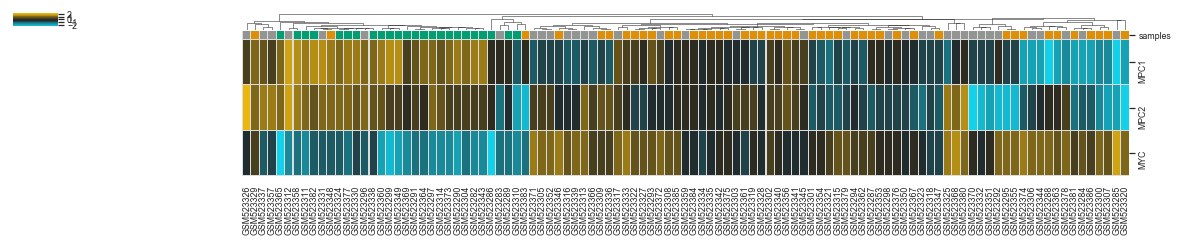

In [2]:
xp.heatmap(geo_scaled, meta, gene_list=['MPC1','MPC2','MYC'], sample_palette=geo_colors, figsize=(20,3))

<Figure size 432x288 with 0 Axes>

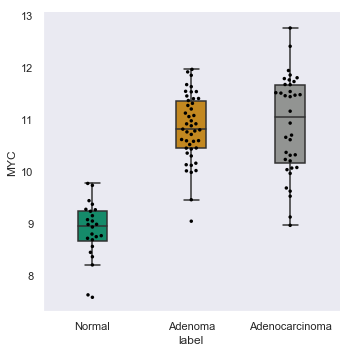

In [4]:
xp.gene_overview(geo_collapsed, meta, 'MYC', geo_colors, order=['Normal','Adenoma','Adenocarcinoma'])